### Projeto desenvolvido

##### Segue abaixo a sequência do projeto

 Análise Exploratória dos Dados

1. Realização de análise inicial dos dados:
   - Verificação a distribuição das variáveis (idade, renda, tempo no site, etc.).
   - Identificação valores ausentes ou inconsistências nos dados.
   - Exploração possíveis relações entre as variáveis independentes e a variável alvo (Compra).

Pré-processamento dos Dados

2. Pré-processamento dos Dados:
   - Normalizar ou padronizar variáveis numéricas, se necessário.
   - Realizar codificação para variáveis categóricas, transformando-as em valores numéricos.
   - Dividir os dados em conjuntos de treino e teste.

 Construção do Modelo de Classificação

3. Construção do Modelo de Classificação:
   - Treinar um modelo simples de classificação (Random Forest).
   - Avaliar o modelo utilizando métricas apropriadas.

 Interpretação dos Resultados

4. Interpretação dos Resultados:
   - Identificar quais variáveis mais influenciaram na decisão do modelo.
   - Explicar o desempenho do modelo e propor possíveis melhorias.

5. Extra:
- Implementações adicionais e insights inovadores.



Inicio do projeto

1. Realização de análise inicial dos dados

Utilizarei pandas para as primeiras análises

In [43]:
import pandas as pd

# Dados
data = pd.read_csv("Dataset.csv")

Entendimento e tratamento dos dados

In [44]:

print(data.info()) 
print(data.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                190 non-null    float64
 1   Renda Anual (em $)   189 non-null    float64
 2   Gênero               193 non-null    object 
 3   Tempo no Site (min)  200 non-null    float64
 4   Anúncio Clicado      190 non-null    object 
 5   Compra (0 ou 1)      200 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB
None
   Idade  Renda Anual (em $)    Gênero  Tempo no Site (min) Anúncio Clicado  \
0   29.0             30000.0  Feminino             5.741706             Não   
1   58.0             50000.0  Feminino            21.885505             Sim   
2   50.0             70000.0  Feminino             6.121339             Não   
3   21.0            100000.0  Feminino            16.264925             Não   
4   59.0             50000.0  Femi

Organização do dataset e limpeza dos dados

In [45]:

print(data.isnull().sum())

Idade                  10
Renda Anual (em $)     11
Gênero                  7
Tempo no Site (min)     0
Anúncio Clicado        10
Compra (0 ou 1)         0
dtype: int64


In [46]:
print(data.describe())

            Idade  Renda Anual (em $)  Tempo no Site (min)  Compra (0 ou 1)
count  190.000000          189.000000           200.000000       200.000000
mean    38.510526        58253.968254            17.349090         0.330000
std     12.679918        25612.061811             7.724088         0.471393
min     18.000000        30000.000000            -1.000000         0.000000
25%     28.000000        30000.000000            10.860240         0.000000
50%     38.000000        50000.000000            18.197552         0.000000
75%     50.000000        70000.000000            23.887341         1.000000
max     59.000000       100000.000000            29.853484         1.000000


In [47]:
data = data.dropna()
print(data.isnull().sum())

Idade                  0
Renda Anual (em $)     0
Gênero                 0
Tempo no Site (min)    0
Anúncio Clicado        0
Compra (0 ou 1)        0
dtype: int64


Limpeza de valores negativos errôneos

In [48]:

# Identificar e corrigir valores negativos nas colunas 'Idade' e 'Tempo no Site'
data = data[data['Idade'] > 0]
data = data[data['Tempo no Site (min)'] > 0]

Renomear algumas colunas para que facilite em futuras funções ( Não precisaria, apenas detalhe)

In [49]:
data.rename(columns={
    'Tempo no Site (min)': 'Tempo_Site',
    'Idade': 'Idade',
    'Renda Anual (em $)': 'Renda_Anual',
    'Compra (0 ou 1)': 'Compra',
    'Gênero': 'Genero',
    'Anúncio Clicado': 'Anuncio_Clicado'
}, inplace=True)
print(data.columns)

Index(['Idade', 'Renda_Anual', 'Genero', 'Tempo_Site', 'Anuncio_Clicado',
       'Compra'],
      dtype='object')


Converter tipos de variáveis

In [50]:

# Convertendo tipos de dados
data['Compra'] = data['Compra'].astype(int)

#  Codificar variáveis categóricas
data['Genero'] = data['Genero'].map({'Feminino': 1, 'Masculino': 2}) 

print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            165 non-null    float64
 1   Renda_Anual      165 non-null    float64
 2   Genero           165 non-null    int64  
 3   Tempo_Site       165 non-null    float64
 4   Anuncio_Clicado  165 non-null    object 
 5   Compra           165 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 9.0+ KB
None


Após tratar os dados irei, começa as análises. No qual a análise descritiva inicial será apartir de:
- Ver estatísticas gerais sobre as variáveis numéricas
- Ver a distribuição da variável alvo "Compra"

In [51]:

print(data.describe())

print(data['Compra'].value_counts())

            Idade    Renda_Anual      Genero  Tempo_Site      Compra
count  165.000000     165.000000  165.000000  165.000000  165.000000
mean    39.254545   59515.151515    1.509091   17.994546    0.321212
std     12.829394   26221.524872    0.501439    7.191249    0.468364
min     18.000000   30000.000000    1.000000    5.052596    0.000000
25%     28.000000   30000.000000    1.000000   12.616978    0.000000
50%     39.000000   50000.000000    2.000000   18.312317    0.000000
75%     51.000000   70000.000000    2.000000   24.047671    1.000000
max     59.000000  100000.000000    2.000000   29.853484    1.000000
Compra
0    112
1     53
Name: count, dtype: int64


Verificação estatística de renda por compra

In [52]:
data_group= data.groupby(['Tempo_Site', 'Idade', 'Renda_Anual', 'Genero' ])["Compra"].mean()
data_group

Tempo_Site  Idade  Renda_Anual  Genero
5.052596    23.0   100000.0     2         1.0
5.167760    29.0   50000.0      2         1.0
5.307743    41.0   100000.0     2         0.0
5.685508    58.0   100000.0     2         0.0
5.741706    29.0   30000.0      1         0.0
                                         ... 
28.940632   46.0   30000.0      2         1.0
29.781400   21.0   30000.0      2         1.0
29.781581   38.0   30000.0      1         0.0
29.812088   49.0   30000.0      2         1.0
29.853484   54.0   30000.0      1         0.0
Name: Compra, Length: 165, dtype: float64

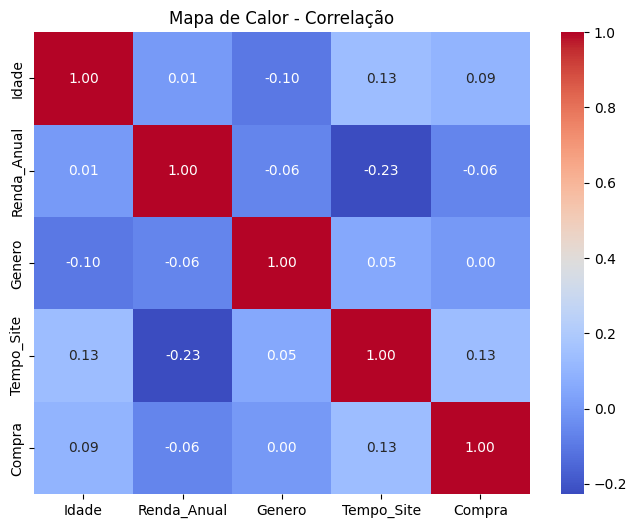

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_copy= data.copy()
data_copy= data.drop(columns=["Anuncio_Clicado"])
correlation_matrix = data_copy.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor - Correlação')
plt.show()

Visualização das Relações como a variável compra;
- Distribuição de "Compra" por variáveis categóricas (como "Gênero" e "Anúncio Clicado")
- Relação entre variáveis contínuas (como "Tempo_Site" e "Renda_Anual") e "Compra"
- Correlação entre variáveis contínuas
- Porém para essas análises vou ter que utilizar mais bibliotecas ( seaborn e matplotlib)

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

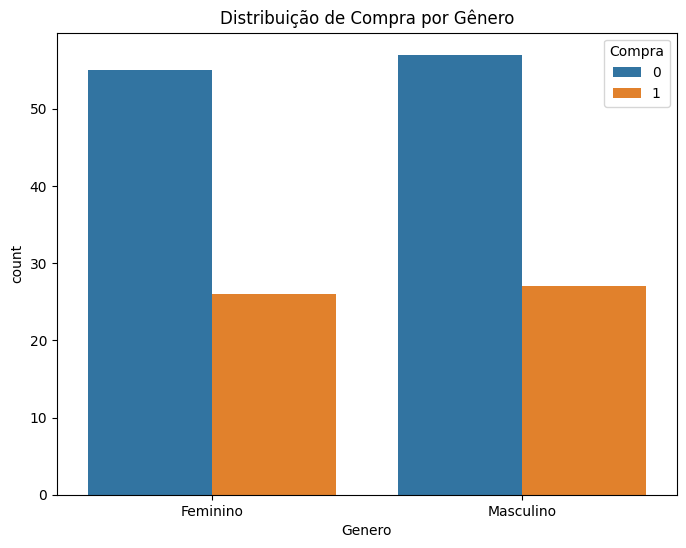

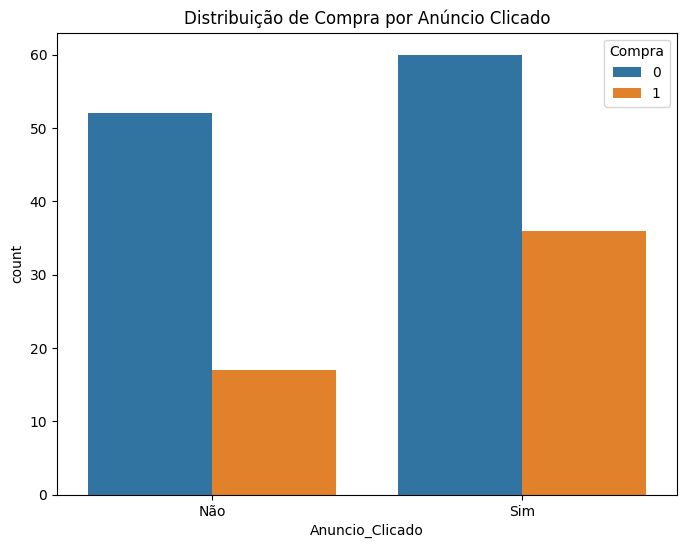

In [55]:
# Gráfico para a variável "Compra" por "Gênero"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Genero', hue='Compra')
plt.title('Distribuição de Compra por Gênero')
plt.xticks(ticks=[0, 1], labels=['Feminino', 'Masculino'])
plt.show()

# Gráfico para a variável "Compra" por "Anúncio Clicado"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Anuncio_Clicado', hue='Compra')
plt.title('Distribuição de Compra por Anúncio Clicado')

plt.show()

C:\Users\jvito\AppData\Local\Temp\ipykernel_17108\344803614.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_tempo_site, y=mean_tempo_site.index, orient='h', palette='Blues')


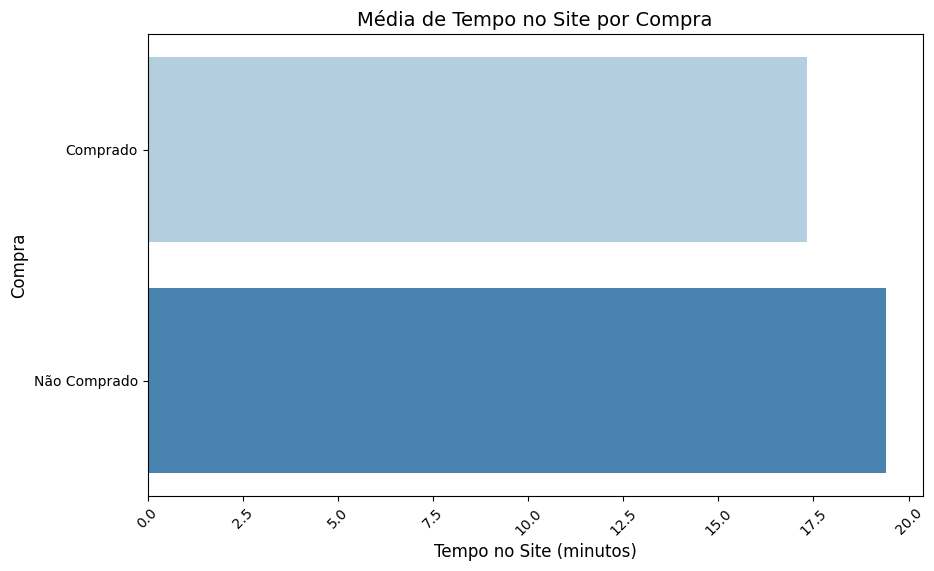

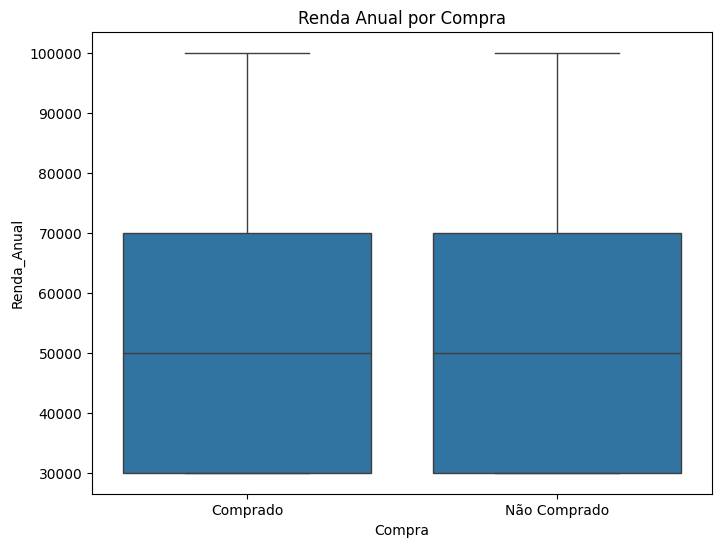

In [56]:
# Gráfico de dispersão de "Tempo_Site" por "Compra"
plt.figure(figsize=(10, 6))

mean_tempo_site = data.groupby('Compra')['Tempo_Site'].mean()

sns.barplot(x=mean_tempo_site, y=mean_tempo_site.index, orient='h', palette='Blues')

plt.title('Média de Tempo no Site por Compra', fontsize=14)
plt.xlabel('Tempo no Site (minutos)', fontsize=12)
plt.ylabel('Compra', fontsize=12)
plt.xticks(rotation=45)
plt.yticks([0, 1], ['Comprado', 'Não Comprado'])  
plt.show()

# Gráfico de dispersão de "Renda_Anual" por "Compra"
plt.figure(figsize=(8, 6))
sns.boxplot(x='Compra', y='Renda_Anual', data=data)
plt.title('Renda Anual por Compra')
plt.xticks(ticks=[0, 1], labels=['Comprado', 'Não Comprado'])
plt.show()

In [57]:
# Calcular a matriz de correlação entre as variáveis contínuas
corr = data[['Tempo_Site', 'Idade', 'Renda_Anual']].corr()
corr_table = pd.DataFrame(corr)
print(corr_table)

             Tempo_Site     Idade  Renda_Anual
Tempo_Site     1.000000  0.133721    -0.227467
Idade          0.133721  1.000000     0.007438
Renda_Anual   -0.227467  0.007438     1.000000


Em seguida, realização de testes estatísticos. Afim de encontrar relações significativas.

In [58]:
from scipy.stats import ttest_ind

In [59]:
#Teste para comparar "Tempo_Site" entre as duas classes de "Compra"
compra = data[data['Compra'] == 1]['Tempo_Site']
nao_compra = data[data['Compra'] == 0]['Tempo_Site']

t_stat, p_val = ttest_ind(compra, nao_compra)
print(f'Teste T para Tempo_Site: T-statistic = {t_stat}, P-value = {p_val}')

# Teste para comparar "Renda_Anual" entre as duas classes de "Compra"
compra_renda = data[data['Compra'] == 1]['Renda_Anual']
nao_compra_renda = data[data['Compra'] == 0]['Renda_Anual']

t_stat_renda, p_val_renda = ttest_ind(compra_renda, nao_compra_renda)
print(f'Teste T para Renda_Anual: T-statistic = {t_stat_renda}, P-value = {p_val_renda}')

Teste T para Tempo_Site: T-statistic = 1.7332704709681954, P-value = 0.08493869481714775
Teste T para Renda_Anual: T-statistic = -0.7894403796464088, P-value = 0.4310015014812093


Análise de Variância para variáveis categóricas

In [60]:
from scipy.stats import f_oneway

In [61]:
anova_result = f_oneway(
    data[data['Genero'] == 'Masculino']['Compra'],
    data[data['Genero'] == 'Feminino']['Compra']
)
print(f'ANOVA para Gênero: F-statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}')

ANOVA para Gênero: F-statistic = nan, P-value = nan


C:\Users\jvito\AppData\Local\Temp\ipykernel_17108\3840860246.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = f_oneway(


Observa-se que não a diferença significativa entre masculino e feminino, resultado >0.5

# 2. Pré-processamento de dados 

Preparação dos dados:
Adicionarei mais duas bibliotecas

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [63]:
# Separando as variáveis independentes (X) e a variável alvo (y)
X = data.drop(columns=['Compra', 'Renda_Anual'])
y = data['Compra']

In [64]:
# Codificando variáveis categóricas
# Aqui estamos usando LabelEncoder para as variáveis categóricas (como 'Genero', 'Anuncio_Clicado')
encoder = LabelEncoder()

categorical_columns = ['Genero', 'Anuncio_Clicado'] 
for col in categorical_columns:
    X[col] = encoder.fit_transform(X[col])

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
# Selecionar as colunas para escalonamento
columns_to_scale = ['Idade', 'Renda_Anual', 'Genero', 'Tempo_Site']
# Inicializar o MinMaxScaler
scaler = MinMaxScaler()
# Aplicar o escalonamento
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [67]:
print(data.columns)

Index(['Idade', 'Renda_Anual', 'Genero', 'Tempo_Site', 'Anuncio_Clicado',
       'Compra'],
      dtype='object')


In [68]:

from imblearn.over_sampling import SMOTE
from collections import Counter

In [69]:

print(f"Distribuição original das classes: {Counter(y)}")

# Aplicando SMOTE
smote = SMOTE(sampling_strategy=0.8,
              random_state=42
              )
X, y = smote.fit_resample(X, y)

# Convertendo de volta para um DataFrame
data = pd.DataFrame(X, columns=X.columns)
data['comprado'] = y

# Mostrando a nova distribuição das classes
print(f"Distribuição após SMOTE: {Counter(y)}")


Distribuição original das classes: Counter({0: 112, 1: 53})
Distribuição após SMOTE: Counter({0: 112, 1: 89})


In [70]:


# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
# Treinar o modelo Random Forest com os dados balanceados e transformados
rf_var_lr = RandomForestClassifier(
    n_estimators = 50,
    max_depth = 10,
    min_samples_split = 2,
    min_samples_leaf = 4,
    max_features = 'sqrt',
    oob_score = True,
    bootstrap = True,
    random_state = 42,
    verbose = 0,
    class_weight = 'balanced'  # Lidar com classes desbalanceadas
)
rf_var_lr.fit(X_train, y_train)
feature_importances = pd.Series(rf_var_lr.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False))

Tempo_Site         0.535487
Idade              0.354819
Genero             0.064087
Anuncio_Clicado    0.045606
dtype: float64


# 3. Utilização do Random Forest

Treinamento do Modelo Random Forest:
- Usarei a classe RandomForestClassifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


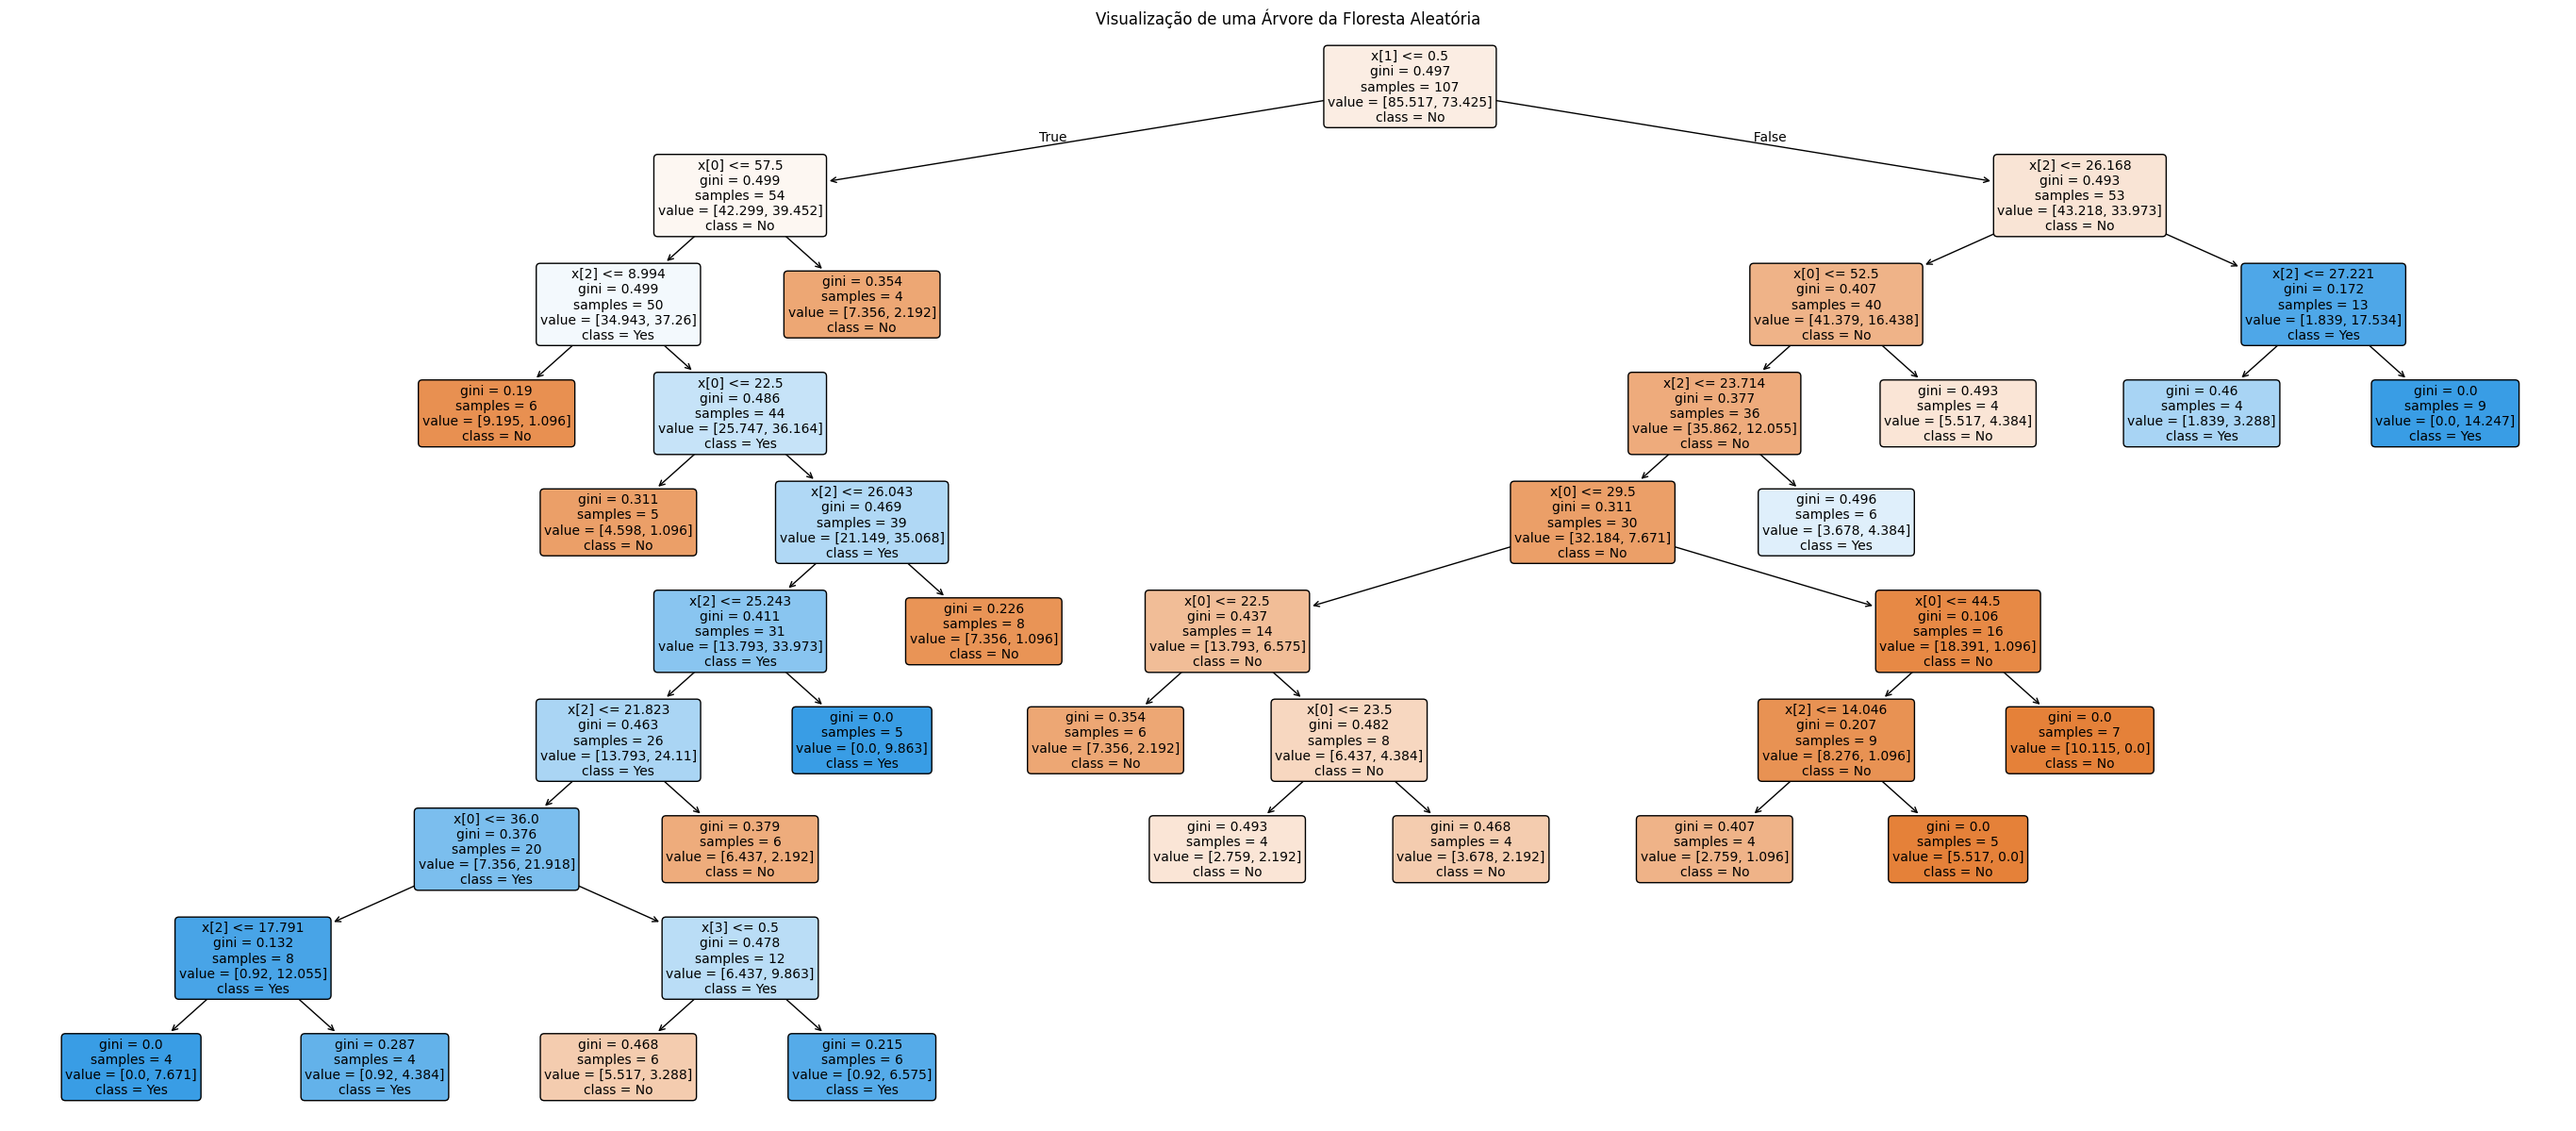

In [75]:
# Modelo Random Forest
rf_model = RandomForestClassifier(
                                   n_estimators=50, 
                                   random_state=42,
                                   max_depth=10,
                                   min_samples_split=2 ,
                                   min_samples_leaf=4 ,
                                   class_weight='balanced'
                                   
                                   )

# Treinando o modelo
rf_model.fit(X_train, y_train)

# Selecionar uma árvore individual da floresta
tree = rf_model.estimators_[0]  # Seleciona a primeira árvore como exemplo

# Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Configurar o tamanho do gráfico
plt.figure(figsize=(35, 15))

# Plotar a árvore
plot_tree(
    tree,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=10
)


# Mostrar o gráfico
plt.title("Visualização de uma Árvore da Floresta Aleatória")
plt.show()

Avaliação do Modelo

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


###### acurácia, precisão, recall, e F1-score.
- Acurácia: É a medida de quão frequentemente o modelo está correto.

- Precisão: Indica a exatidão das previsões positivas do modelo.

- Recall: Mede a capacidade do modelo de identificar corretamente todos os casos positivos.

- F1-score: É a média harmônica entre precisão e recall.

In [77]:
# Previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.4f}')

# Relatório de classificação
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

# Matriz de Confusão
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.8049
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.70      0.88      0.78        16

    accuracy                           0.80        41
   macro avg       0.80      0.82      0.80        41
weighted avg       0.82      0.80      0.81        41

Matriz de Confusão:
[[19  6]
 [ 2 14]]


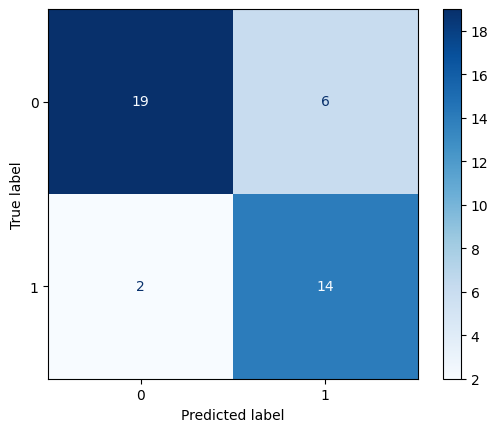

In [78]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
# Realizar validação cruzada
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1')  # Usa 5 folds

# Exibir os resultados
print("Scores de validação cruzada:", cv_scores)
print("Média dos scores:", cv_scores.mean())
print("Desvio padrão dos scores:", cv_scores.std())


Scores de validação cruzada: [0.61111111 0.61111111 0.60606061 0.71428571 0.65116279]
Média dos scores: 0.6387462666532434
Desvio padrão dos scores: 0.041124528617401845


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Função para calcular e exibir métricas
def calcular_metricas(y_test, y_pred):
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, f1

# Previsões para treino e teste
y_train_pred = rf_model.predict(X_train)


# Calculando métricas para o conjunto de treino
precision_train, recall_train, f1_train = calcular_metricas(y_train, y_train_pred)

# Calculando métricas para o conjunto de teste
precision_test, recall_test, f1_test = calcular_metricas(y_test, y_pred)

# Exibindo as métricas lado a lado
print("Comparação de Métricas - Treino vs Teste:")

print(f'\nvalor f1 de treino: {f1_train:.2f}')
print(f'valor f1 de teste: {f1_test:.2f}')
print(f'\nvalor precision de treino: {precision_train:.2f}')
print(f'valor precision de teste: {precision_test:.2f}')
print(f'\nvalor recall de treino: {recall_train:.2f}')
print(f'valor recall de teste: {recall_test:.2f}')

Comparação de Métricas - Treino vs Teste:

valor f1 de treino: 0.82
valor f1 de teste: 0.78

valor precision de treino: 0.81
valor precision de teste: 0.70

valor recall de treino: 0.82
valor recall de teste: 0.88


Ajustando os Hiperparâmetros

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
# Definindo o grid de parâmetros para busca

param_grid = {
   'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ["sqrt", "log2"]
}

# Coloquei o max_features como uma tentativa de tratar meus dados, com a raiz

# Inicializando o GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,
                            param_grid=param_grid,
                              cv=3,
                                n_jobs=-1,
                                  verbose=2,
                                  scoring="recall")

# Treinando o modelo com busca em grid
grid_search.fit(X_train, y_train)

# Melhor combinação de parâmetros
print(f'Melhores parâmetros: {grid_search.best_params_}')

# Avaliando o modelo com os melhores parâmetros
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Acurácia e relatório para o modelo otimizado
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Acurácia do modelo otimizado: {accuracy_best:.4f}')
print('Relatório de Classificação (Modelo Otimizado):')
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Melhores parâmetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Acurácia do modelo otimizado: 0.7805
Relatório de Classificação (Modelo Otimizado):
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.67      0.88      0.76        16

    accuracy                           0.78        41
   macro avg       0.78      0.80      0.78        41
weighted avg       0.81      0.78      0.78        41



Importância de variavéis

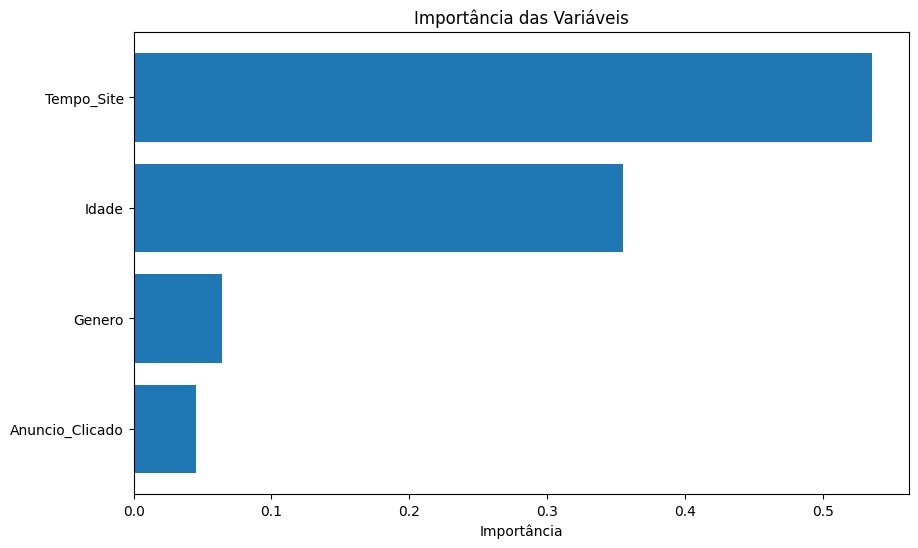

In [85]:

importances = rf_model.feature_importances_
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title("Importância das Variáveis")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Importância")
plt.show()

# 4 . Interpretação dos resultados

* Interpretação:
- Após o Random Forest é notório que o que mais influência do tempo de compra é o tempo no site seguido de idade, como observado no último gráfico (Importância das variáveis).
- Porém, em relação ao desempenho modelo está funcionando razoavelmente bem para identificar os casos "Comprado" (classe 0), mas tem um desempenho fraco para "Não Comprado" (classe 1), devido ao desequilíbrio de classes.
* Observações: 

Os verdadeiros negativos e os falsos positivos, estão relacionados com os clientes que visualizaram e não compraram.
Os positivos e os falsos negativos são clientes que realmente compraram.

Com o número de compradores 50% menor do que os de não compradores, o modelo com foco em recall, conseguiu recuperar (menos com desbalanceamento) o balanceamento, me entregando com boas métricas. Pois com o Random Forest consigo adequar para que eu consigo verificar melhor o comportamento de compradores.


- Dados de teste: 

1º Teste:

Valor não favorável
* Arurácia enganosa: 0,67 devido ao balanceamente, pois a precisão acusava o mesmo valor e o f1 score mostrava um desequilibrio entre precisão (especificidade) e recall (sensibilidade)
 
Valores para 'Compra' =1:

f1-score:0,24
Precisão: 0,40 ; 
Recall: 0,17 ; f1-score:0,24

2º Teste:

- Foram alterados valores de hiperparêmetros: n_estimators=50, random_state=42,max_depth=10, min_samples_split=2 , min_samples_leaf=4 , class_weight='None'

Foi observado uma pequena melhora nos valores do recall e f1, alcançando os seguintes 

Valores para 'Compra' =1:
f1-score: 0,38;
Precisão: 0,44 ; 
Recall: 0,33 

3º Teste:

- Mesmo com os ajustes de hiperparâmetros a melhora foi insatisfatória, visto que o nosso objetivo maior é capturar padrão dos compradores.
Entretanto, com o SMOTE foi realizado o balanceamento de 0,8 de não compras, para compras. Com o balanceamento mais o hiperparâmetro(scoring= recall), as métricas se apresentaram mais equilibradas com têndencia forte para o recall mostrando que o modelo capturou bem os insights e "comportamentos" de compradores.

Foi observado grande evolução nas métricas gerais:

Valores para 'Compra' =1:

f1-score: 0,78;
Precisão: 0,70 ; 
Recall: 0,88 








* Melhoria:

- Para melhoria: 

Criar novas variaveis para melhorar a previsão do modelo e diminuir a complexidade da relação entre os dados
Aumentar o número da amostra de dados para melhor análise
Melhorar ajustes de modelo para evitar overfitting mantendo o recall o mais alto possível e em equilíbrio com as demais métricas





